# WeatherPy
---
## Starter Code to Generate Random Geographic Coordinates and a List of Cities.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by using `citypy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | tocache
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | zalegoshch'
Processing Record 8 of Set 1 | karwar
Processing Record 9 of Set 1 | kone
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | birch bay
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | la junta
Processing Record 16 of Set 1 | chibougamau
Processing Record 17 of Set 1 | umm kaddadah
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | vorgashor
Processing Record 20 of Set 1 | chala
Processing Record 21 of Set 1 | vingt cinq


In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,5.97,35,75,2.57,US,1712014156
1,hawaiian paradise park,19.5933,-154.9731,25.73,82,100,5.66,US,1712014156
2,tocache,-8.1842,-76.5125,22.19,99,100,0.41,PE,1712014157
3,waitangi,-43.9535,-176.5597,14.34,80,100,1.34,NZ,1712014157
4,ilulissat,69.2167,-51.1000,-3.99,93,75,0.00,GL,1712014157


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,5.97,35,75,2.57,US,1712014156
1,hawaiian paradise park,19.5933,-154.9731,25.73,82,100,5.66,US,1712014156
2,tocache,-8.1842,-76.5125,22.19,99,100,0.41,PE,1712014157
3,waitangi,-43.9535,-176.5597,14.34,80,100,1.34,NZ,1712014157
4,ilulissat,69.2167,-51.1000,-3.99,93,75,0.00,GL,1712014157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

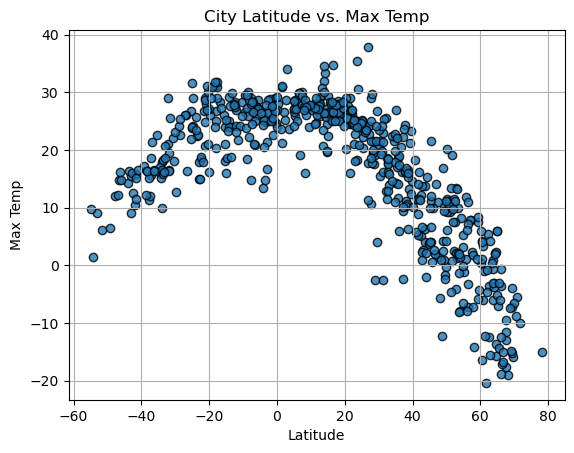

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity

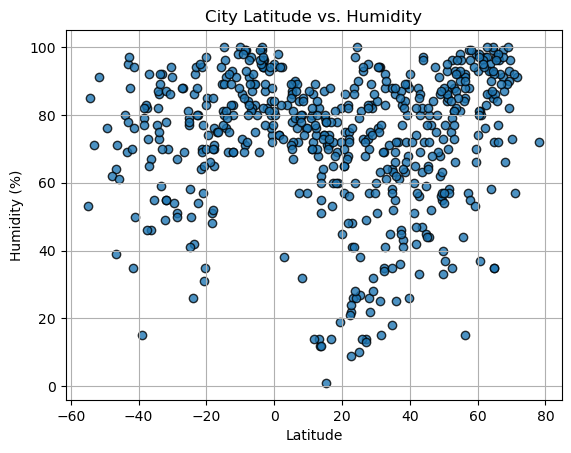

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness

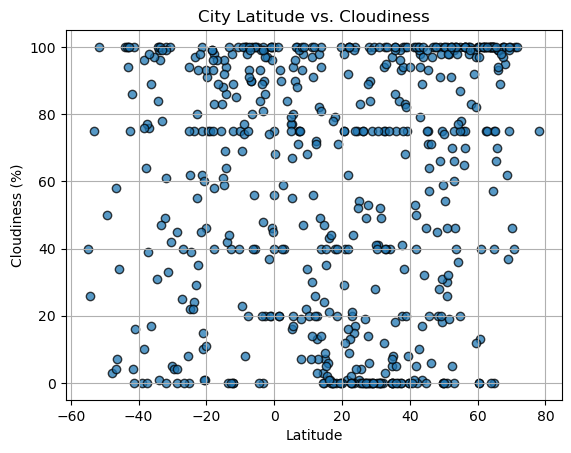

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

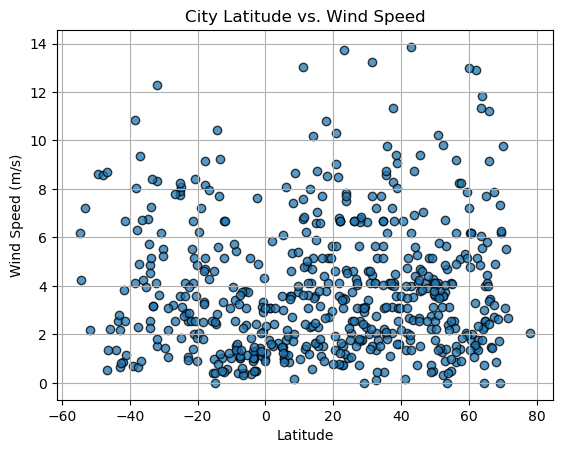

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, xlabel, ylabel):
    slope, intercept, r_val, p_val, stderr = linregress(x, y)
    line = slope * x + intercept

    print(f'The r-value is: {r_val}')

    plt.scatter(x, y, c='blue')
    plt.scatter(x, y)
    plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,5.97,35,75,2.57,US,1712014156
1,hawaiian paradise park,19.5933,-154.9731,25.73,82,100,5.66,US,1712014156
4,ilulissat,69.2167,-51.1000,-3.99,93,75,0.00,GL,1712014157
5,zalegoshch',52.9008,36.8869,13.49,88,66,3.73,RU,1712014158
6,karwar,14.8000,74.1333,24.55,87,24,1.65,IN,1712014158


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tocache,-8.1842,-76.5125,22.19,99,100,0.41,PE,1712014157
3,waitangi,-43.9535,-176.5597,14.34,80,100,1.34,NZ,1712014157
7,kone,-21.0595,164.8658,28.05,57,15,2.01,NC,1712014159
8,edinburgh of the seven seas,-37.0676,-12.3116,18.55,92,76,9.37,SH,1712014159
12,port-aux-francais,-49.3500,70.2167,6.44,76,50,8.60,TF,1712014160


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.885578672162244


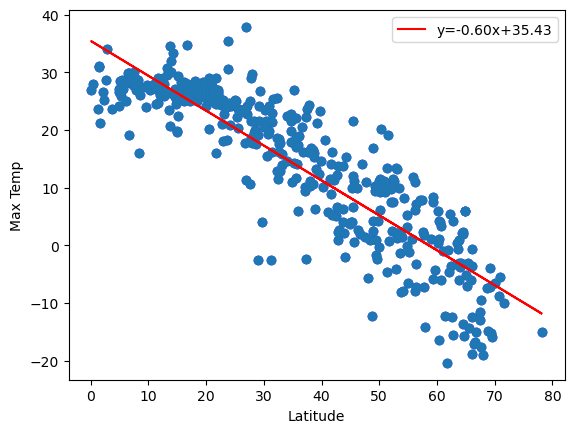

In [63]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp")

The r-value is: 0.6926018863607604


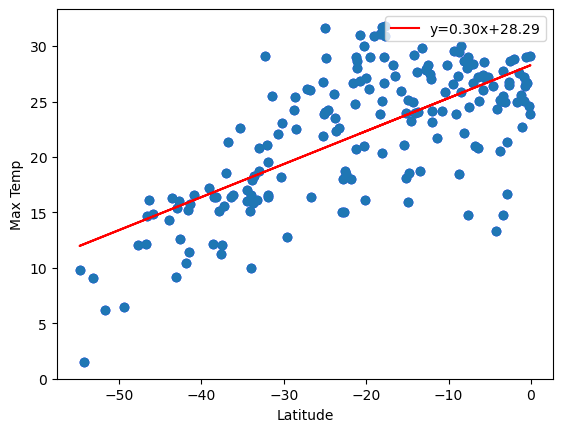

In [64]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Linear Relationship Discussion:** In the plots above, the linear regression models show us that there is a negative correlation between latitude and max temperature in the northern hemisphere while there is a positive correlation between the latitude and max temperature in the southern hemisphere. Both also have a higher r-value indicating that the value points are showing the strong correlation between the two variables.

### Humidity vs. Latitude Linear Regression plot

The r-value is: 0.22918563967518424


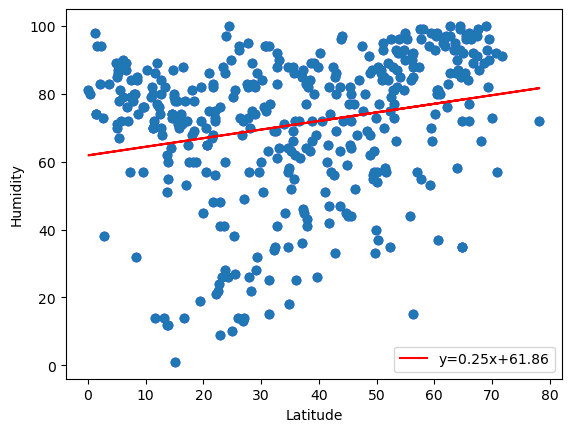

In [65]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.3805679651286529


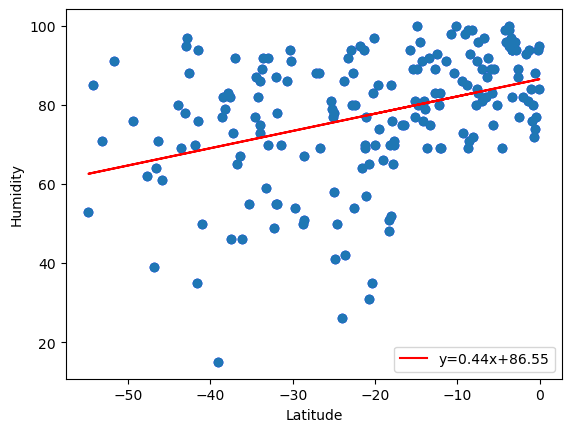

In [66]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** In the models above, we are able to see that the linear regression model is positive for both hemispheres. As the latitude goes higher so does the humidity, but this is also not the most accurate data. This is because the r-value is low for both of these plots. The correlation between humidity and latitude is pretty weak because both values are further from 1 and -1 than they are from 0. When this is the case it means that the points on the plot are very spread apart.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.293140058743201


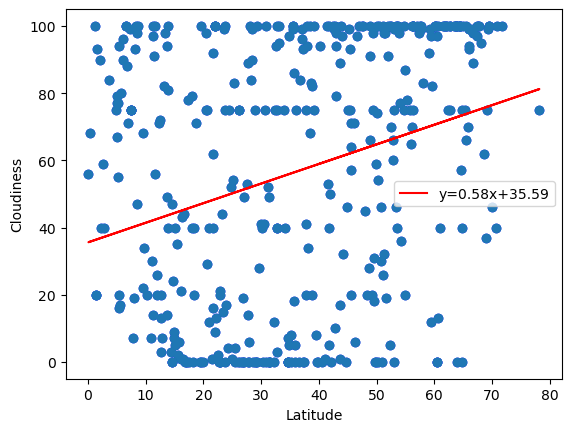

In [67]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.18110028494336367


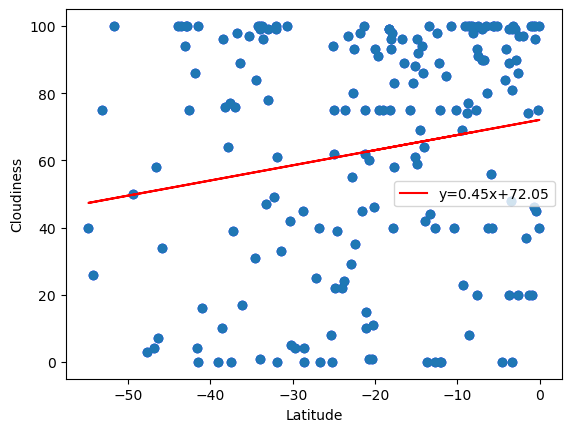

In [68]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In these plots we can see they are both postively correlated according to the linear regression models, but like the last set of plots they have weak r-values. This means the true correllation between cloudiness and latitude is actually weak and the plot ponts are very spread out, telling us that they do not necessarily change because of one another.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04952527898286158


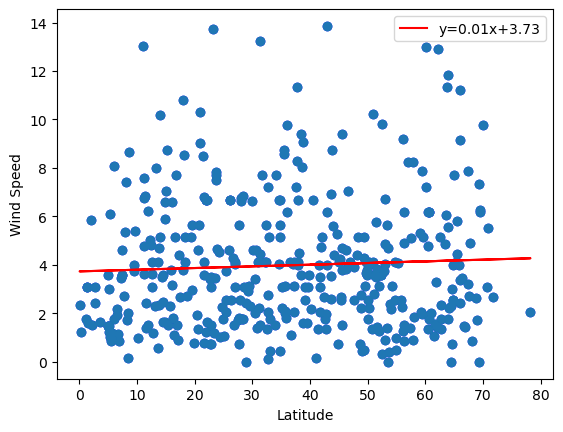

In [69]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: -0.3046381932618338


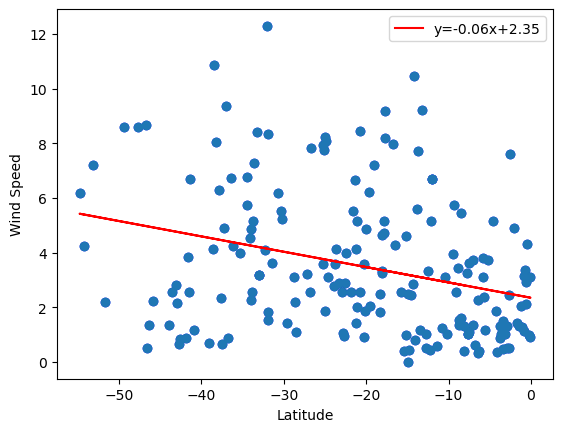

In [70]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** In the above plots we can see that there is a very weak correlation between latitude and wind speed in both hemispheres. They are more likely to have no correlation at all than any positive or negative correlation. These plots and linear regression models ultimatley tell us that latitude and wind speed are unrelated.